In [1]:
# 20250307 24?? 번째??? 수업 ??? 우와 대박

# 방범용 CCTV 위치와 인구 데이터분석
- http://data.busan.go.kr/
- 파일 데이터 "부산광역시_방범용 CCTV 정보_20230622.CSV" 다운로드
- 목표 : CCTV 수와 인구대비 CCTV 비율을 파악
- 인구대비 CCTV의 평균치를 확인하고 그로부터 CCTV가 과하게 부족한 구를 확인 

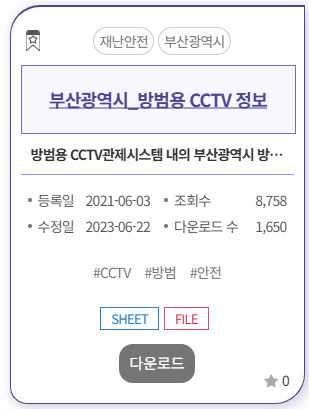

In [5]:
import pandas as pd
file_path = "./data ref/부산광역시방범용CCTV 정보20230622.csv"
CCTV = pd.read_csv(file_path,encoding="EUC-KR")
CCTV.sample(3)

,CCTV 명칭,CCTV 좌표,CCTV 그룹
3577,(6차)암남동_송도해수욕장_고1,"10.1.10.130:0:0:0:0:0:0,10.1.10.130:9400:",서구-15차
4185,(9차)_연수로296번길_36_동해빌라,"10.1.11.183:0:0:0:0:0:0,10.1.11.183:9400:",수영-9차
5710,(11차)_재송179-1_재반보건지소인근_고3,"10.1.11.216:0:0:0:0:0:0,10.1.11.216:9400:",해운대-11차


In [6]:
# CCTV.columns = ["x","xxx","local"]
cctv=CCTV.rename(columns={"CCTV 그룹":"local"})['local']
cctv

0        강서-10차
1        강서-10차
2        강서-10차
3        강서-10차
4        강서-10차
         ...   
6100    해운대-폐공가
6101    해운대-폐공가
6102    해운대-폐공가
6103    해운대-폐공가
6104    해운대-폐공가
Name: local, Length: 6105, dtype: object

In [4]:
# 방법 1
cctv=cctv.apply(lambda x: x.split("-")[0]) # 함수를 적용시키기 위해 apply(데이터프레임 함수)를 씀 !!

# 방법 2
# local_list =[]
# for v in cctv:
#     local_list.append(v.split("-")[0])
# cctv = pd.Series(local_list)

# 방법 3
# cctv = cctv.str.extract(r"(\D+)-")[0]  # 정규표현식 !!!

cctv = cctv.value_counts()  # 몇개가 있는지 세어준다 !!! 헉 이거 썼으면 됐겠다 그 테스트에 !!
cctv = cctv.reset_index()

In [5]:
cctv.sample(3)

,local,count
6,진구,395
7,영도,381
1,사상,422


_________________

In [6]:
import pandas as pd
import warnings
warnings.simplefilter("ignore", UserWarning)  # 헉 !!! 경고를 무시하다니 !!

file_path2 = "./data ref/연령별인구현황월간_202306.xlsx"
ori = pd.read_excel(file_path2,sheet_name="연령별인구현황",skiprows=3) # 3개를 날린 후 보여줘요 !
ori.head(2)

,행정기관코드,행정기관,총 인구수,연령구간인구수,0~9세,10~19세,20~29세,30~39세,40~49세,50~59세,...,10~19세.2,20~29세.2,30~39세.2,40~49세.2,50~59세.2,60~69세.2,70~79세.2,80~89세.2,90~99세.2,100세 이상.2
0,2600000000,부산광역시,"3,306,993","3,306,993","200,627","264,771","386,558","393,792","489,807","539,964",...,"128,872","187,837","191,071","242,526","276,337","296,378","172,706","87,000","13,119",384
1,2611000000,부산광역시 중구,"39,311","39,311",931,"1,773","5,638","4,310","4,582","6,423",...,914,"2,964","2,037","2,096","3,078","4,109","2,877","1,532",251,15


In [7]:
data = ori[['행정기관','총 인구수']]
data.columns = ["local", "population"]
data = data.loc[1:]
data['local'] = data['local'].apply(lambda x:x.replace("부산광역시 ",""))
data = data.reset_index(drop=True) # drop = True는 기존 인덱스를 삭제하고 인덱스를 새롭게 부여 
data

,local,population
0,중구,"39,311"
1,서구,"104,449"
2,동구,"86,809"
3,영도구,"107,006"
4,부산진구,"357,475"
5,동래구,"272,590"
6,남구,"255,786"
7,북구,"276,684"
8,해운대구,"383,355"
9,사하구,"300,922"


In [8]:
# 방법 1
# total.columns =['local','count','localx','population']
# total = total.drop(columns=['localx'])
# total = pd.concat([cctv,data],axis=1)  # concat은 단순히 이어붙이는 것임 !!

# 방법 2 
# total = total.drop(total.columns[2],axis=1) # 이름이 같을 경우 🎸난리🎤난리🎵난리 나🎶~ (feat.블락비)

In [9]:
data['local'] = data['local'].apply(lambda x: x.replace('부산진구 ', '진구').replace('구 ', '').replace('군 ', '') if len(x)>3 else x)

In [10]:
total = pd.merge(cctv, data, on='local')
total['population'] = total['population'].str.replace(",","").astype(int)
total = total.sort_values(by="population", ascending=False)
total = total.set_index('local') # 중요함!!!  > local을 아예 인덱스화 시켜버렸음 !!!
total

,count,population
local,,
해운대,418,383355
진구,395,357475
사하,431,300922
동래,404,272590
금정,403,218711
사상,422,203029
연제,377,202919
기장,344,179384
수영,365,175511


In [11]:
# OS에 사용가능한 , 설치된 폰트를 나열
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib.font_manager as fm
fontlist = fm.findSystemFonts(fontpaths=None, fontext='ttf')
#fontlist : 있는 폰트 다 보여줌 ~

Text(0.2, 0.4, '한글')

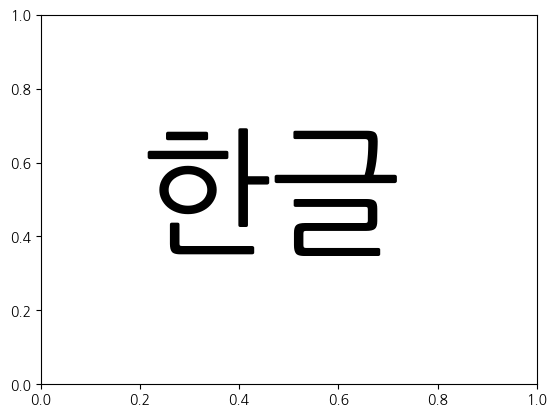

In [12]:
# 윈도우용 폰트 경로 설정
# path = "C:\\Windows\\Fonts\\NanumGothic.ttf"
# font_name = fm.FontProperties(fname=path).get_name()
# rc('font',family=font_name)

# 리눅스용 폰트 경로 설정
plt.rc('font',family ="NanumGothic")
plt.text(0.2,0.4,'한글',size=100)

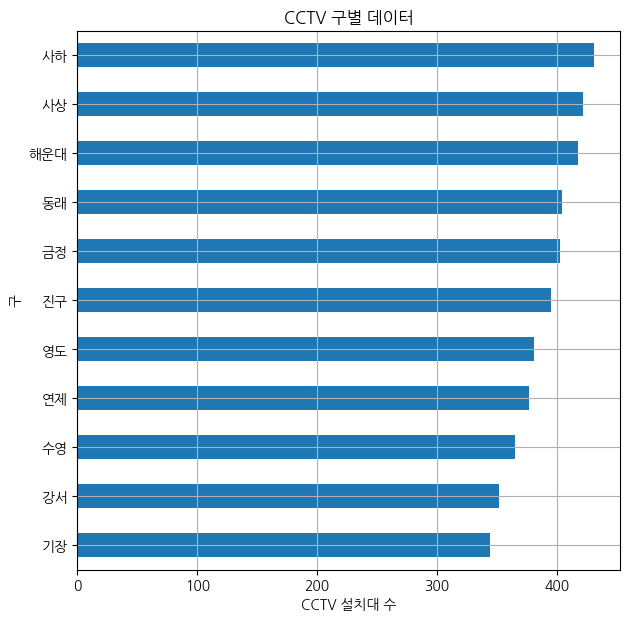

In [13]:
# plt.figure()
# plt.figure()
total['count'].sort_values().plot( kind="barh",grid=True,figsize=(7,7), ylabel="구")

plt.title("CCTV 구별 데이터")
plt.xlabel("CCTV 설치대 수")
plt.show()

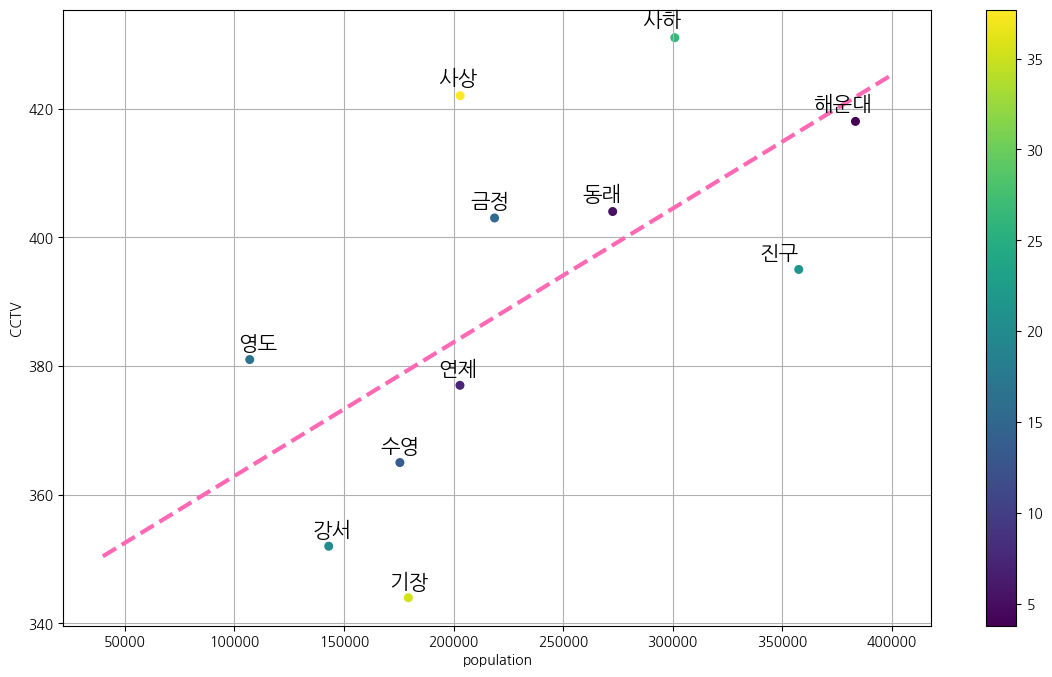

In [14]:
import numpy as np
fp1 = np.polyfit(total['population'],total['count'],1)  # 여기서 1은 기울기 !!

f1 = np.poly1d(fp1)  # 기울기와 함수를 만들어내는 과정

fx = np.linspace(40000,400000,10)
plt.figure(figsize=(14,8))
plt.plot(fx,f1(fx), ls='dashed', lw=3, color='hotpink')

# 오차
total['err'] = np.abs(total['count']-f1(total['population']))

plt.scatter(total['population'],total['count'], s= 30, c = total['err'])
plt.xlabel('population')
plt.ylabel('CCTV')
plt.plot()

# 각 점마다 동의 이름을 부여 !!
for i in range(len(total['population'])):
    plt.text(total['population'].iloc[i]*0.95,total['count'].iloc[i]*1.004,total.index[i],fontsize=15)
                                     #  ㄴ글자가 왼쪽으로 갈 수 있도록 /올라갈 수 있도록 숫자를 곱해줌!!

plt.grid()
plt.colorbar()
plt.show()


In [1]:
# total['local']
# total['count']


# for n in range(len(total['local']))
import matplotlib.pyplot as plt
plt.figure(figsize=(13,10))
plt.text(total['population'].iloc[0],total['count'].iloc[0],total.index[0],fontsize=15)
plt.plot(fx,f1(fx), ls='dashed', lw=3, color='g')

plt.show()

NameError: name 'total' is not defined

<Figure size 1300x1000 with 0 Axes>

(부산)
- CCTV 설치수
- 인구
- 범죄율

(서울)
- CCTV 설치수
- 인구
- 범죄율